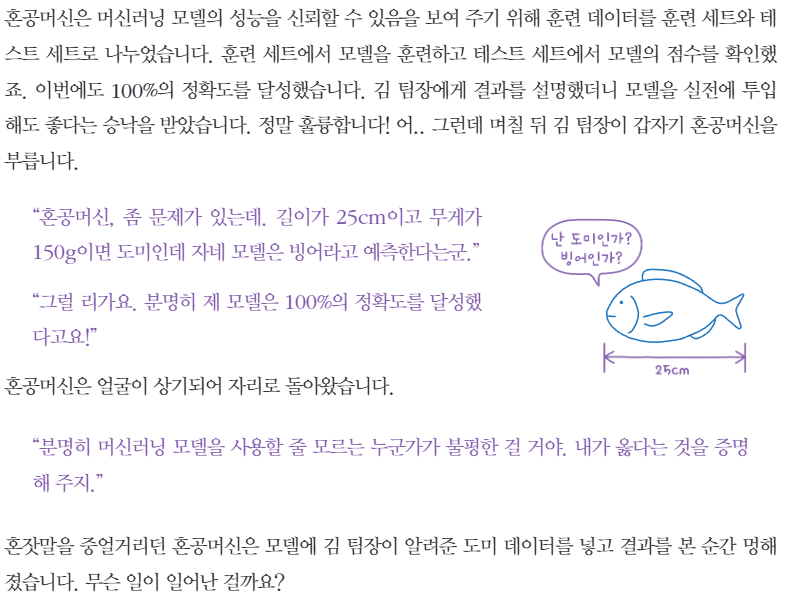

#데이터 불러오기

In [2]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [6]:
import numpy as np

# numpy를 활용해서 리스트 연결
#fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
fish_data = np.column_stack((fish_length, fish_weight))

# print(fish_data[:5])

# np.ones() : 갯수만큼 1로 채워진 리스트 생성
# np.zeros() : 갯수만큼 0으로 채워진 리스트 생성
fish_target = np.concatenate((np.ones(35), np.zeros(14)))


##np.column_stack() 과 np.concatenate()의 차이

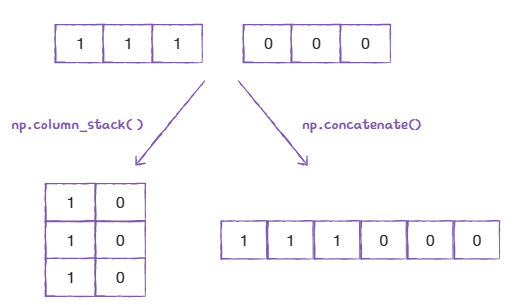

#sklearn 활용하여 train, test 셋 나누기

In [10]:
from sklearn.model_selection import train_test_split

# stratify 해당 클래스 비율에 맞게 데이터를 분할
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42)

# print(train_input.shape, test_input.shape)
# print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


#모델 훈련

In [11]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

#오류가 있는 샘플 데이터를 시각화

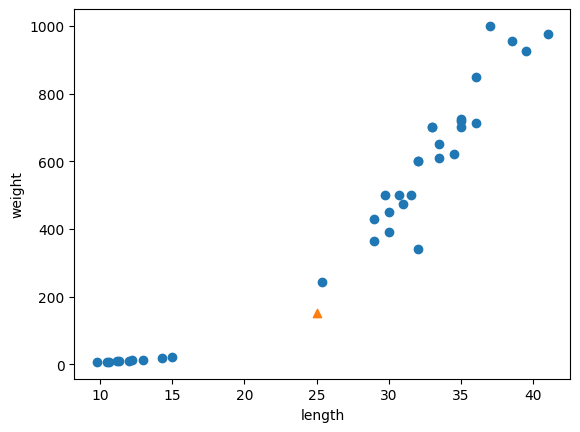

In [12]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

#K-최근접 이웃 알고리즘 방식
- 주변의 샘플 중 다수인 클래스를 예측으로 사용
- KNeighborsClassifier의 이웃 개수인 n_neighbors의 기본값은 5이므로 5개의 이웃 반환


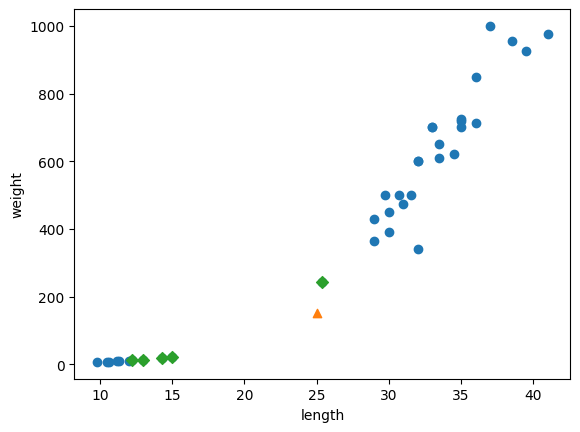

In [13]:
distances, indexes = kn.kneighbors([[25, 150]])

plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [15]:
print(train_input[indexes])
print(train_target[indexes])

print(distances)

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]
[[1. 0. 0. 0. 0.]]
[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


- weight과 length의 범위가 다르기 때문에 위의 시각화에서 판단 불가
- x와 y축의 범위를 동일하게

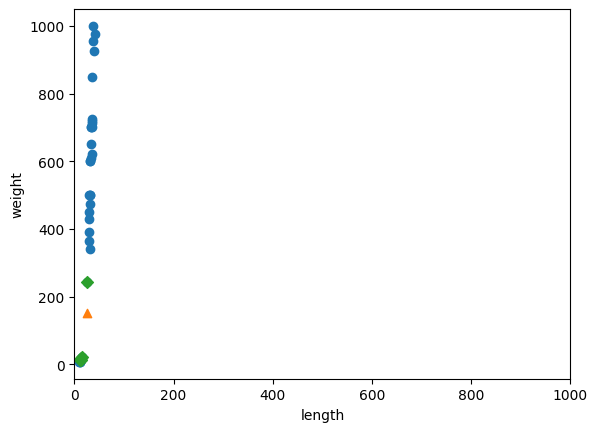

In [16]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')
plt.xlim((0, 1000)) # x 축의 범위를 변경
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 데이터 전처리 (data preprocessing)
- 거리 기반의 알고리즘(ex : k-최근접 이웃)의 경우 특성들의 스케일이 다르면 알고리즘이 올바르게 예측할 수 없음
- 제대로 사용하기 위해 특성값을 일정한 기준으로 맞춰야함

##표준점수 (standard score)
- 특성값이 평균에서 표준편차의 몇 배만큼 떨어져 있는지 정도
- z-score 라고도 부름
- 실제 특성값의 크기와 상관없이 동일한 조건에서 비교 가능
- 분산 : 데이터에서 평균을 뺀 값을 제곱한 다음 평균을 낸 값
- 표준편차 : 분산의 제곱근
- 표준점수 : 각 데이터가 원점에서 몇 표준편차만큼 떨어져 있는지를 나타낸 값

In [18]:
# 평균
# axis = 0 : 행을 따라 각 열의 통계값을 계산
mean = np.mean(train_input, axis = 0)

# 표준편차
std = np.std(train_input, axis = 0)

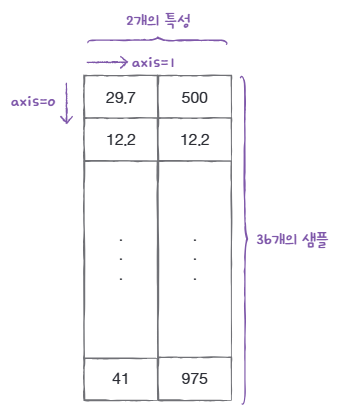

In [22]:
print(mean, std)

# 표준 점수 : 데이터에서 원점(평균)을 뺀 값이 몇 표준편차만큼 떨어져있는지에 대한 값
train_scaled = (train_input - mean) / std

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


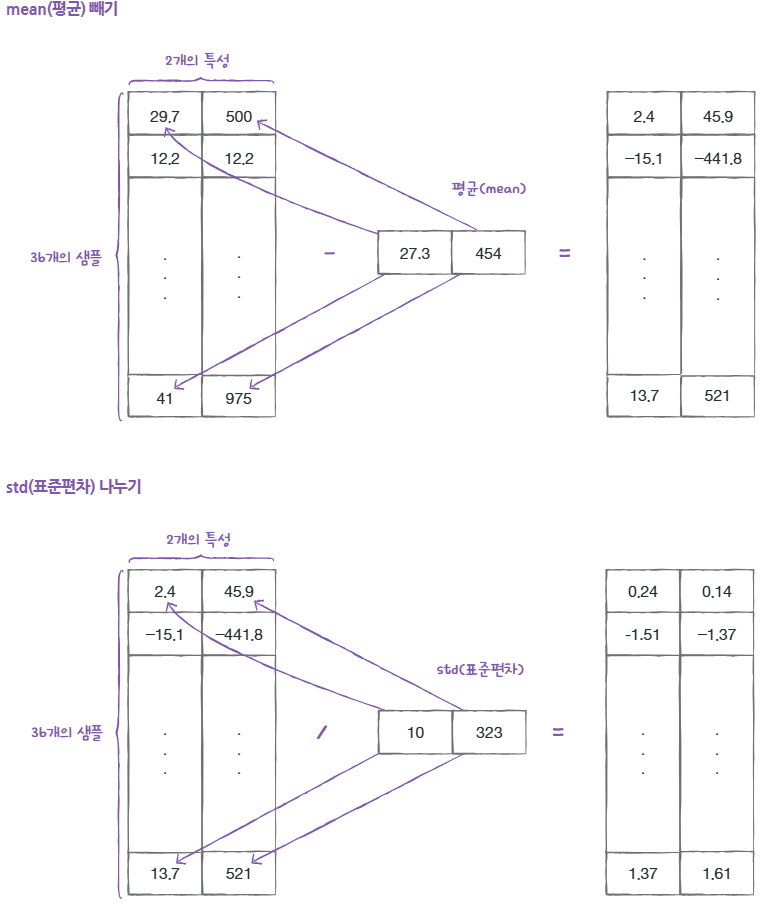

#전처리 후 다시 시각화

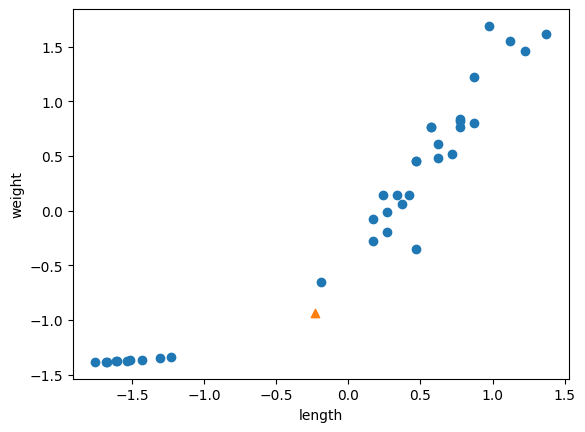

In [23]:
# 데이터를 넣기 전 전처리 작업을 해줘야함
new = ([25, 150] - mean) / std
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

#모델 훈련 및 평가

In [25]:
kn.fit(train_scaled, train_target)

# 평가용 데이터 전처리
test_scaled = (test_input - mean) / std
kn.score(test_scaled, test_target)

1.0

#모델 예측

In [26]:
print(kn.predict([new]))

[1.]


#데이터 전처리 후 샘플에 대한 k-최근접 이웃

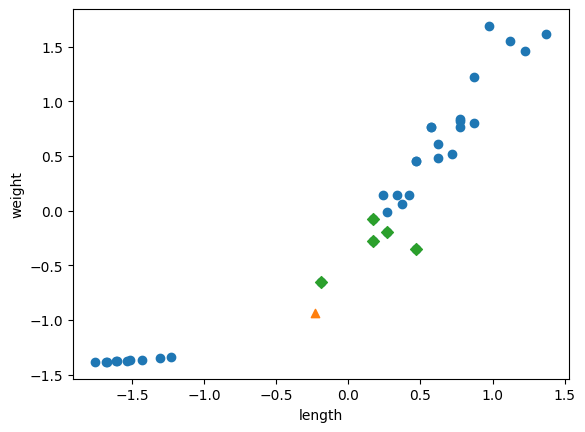

In [27]:
distances, indexes = kn.kneighbors([new])

plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()